In [26]:
import pandas as pd 

In [27]:

import numpy as np 


We use the .dt accessor to access datetime properties of the "Close Approach Date" column, and .year specifically to extract the year component.

The result is stored in a new column called "year," which allows us to work with the year component separately.

In [28]:
date_cols = ['Close Approach Date', 'Close Approach Date (Full)']
df = pd.read_csv("neo_data.csv", parse_dates=date_cols)
df['year']=df['Close Approach Date'].dt.year

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            904 non-null    int64         
 1   Neo Reference ID              904 non-null    int64         
 2   Name                          904 non-null    object        
 3   Limited Name                  904 non-null    object        
 4   Designation                   904 non-null    int64         
 5   NASA JPL URL                  904 non-null    object        
 6   Absolute Magnitude (H)        904 non-null    float64       
 7   Min Diameter (km)             904 non-null    float64       
 8   Max Diameter (km)             904 non-null    float64       
 9   Min Diameter (m)              904 non-null    float64       
 10  Max Diameter (m)              904 non-null    float64       
 11  Min Diameter (miles)          90

In [30]:
df.nunique()

ID                               20
Neo Reference ID                 20
Name                             20
Limited Name                     20
Designation                      20
NASA JPL URL                     20
Absolute Magnitude (H)           20
Min Diameter (km)                20
Max Diameter (km)                20
Min Diameter (m)                 20
Max Diameter (m)                 20
Min Diameter (miles)             20
Max Diameter (miles)             20
Min Diameter (feet)              20
Max Diameter (feet)              20
Is Potentially Hazardous          2
Close Approach Date             903
Close Approach Date (Full)      904
Epoch Date Close Approach       904
Relative Velocity (km/s)        904
Relative Velocity (km/h)        904
Relative Velocity (miles/h)     904
Miss Distance (astronomical)    904
Miss Distance (lunar)           904
Miss Distance (km)              904
Miss Distance (miles)           904
Orbiting Body                     5
year                        

### 3D Scatter Plot with Relative Velocity, Miss Distance, and Min Diameter

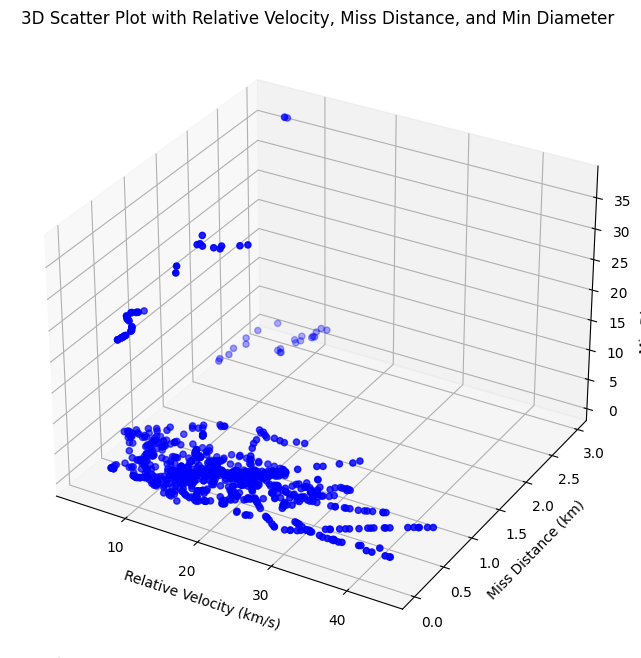

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot using 'Relative Velocity (km/s)', 'Miss Distance (km)', and 'Min Diameter (km)' as axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


x = df['Relative Velocity (km/s)']
y = df['Miss Distance (km)']
z = df['Min Diameter (km)']  

# Create the 3D scatter plot with a blue marker color (c='b')
ax.scatter(x, y, z, c='b', marker='o')

ax.set_xlabel('Relative Velocity (km/s)')
ax.set_ylabel('Miss Distance (km)')
ax.set_zlabel('Min Diameter (km)')  

ax.set_title('3D Scatter Plot with Relative Velocity, Miss Distance, and Min Diameter')
plt.show()



<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



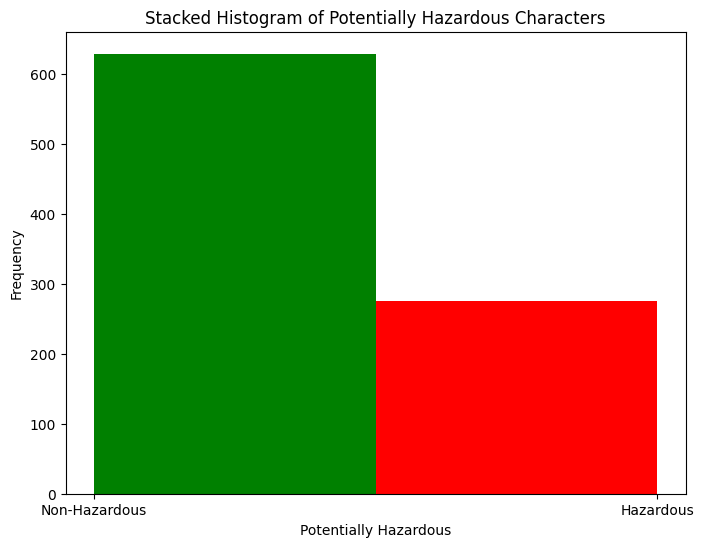

In [32]:
import matplotlib.pyplot as plt
# Filter the data for 'Non-Hazardous' and 'Hazardous' categories
non_hazardous = df[df['Is Potentially Hazardous'] == False]
hazardous = df[df['Is Potentially Hazardous'] == True]
plt.figure(figsize=(8, 6))
plt.hist([non_hazardous['Is Potentially Hazardous'], hazardous['Is Potentially Hazardous']], bins=2, stacked=True, color=['green', 'red'])
plt.xticks([0, 1], ['Non-Hazardous', 'Hazardous'])
plt.xlabel('Potentially Hazardous')
plt.ylabel('Frequency')
plt.title('Stacked Histogram of Potentially Hazardous Characters')
plt.show()




In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In this code, the dataset (df) is being prepared for a machine learning task. Features (X) are defined by dropping specific columns from the dataset, and the target variable (y) is set to the column "Is Potentially Hazardous." 

In [34]:


X = df[['Absolute Magnitude (H)', 'Min Diameter (km)', 'Relative Velocity (km/s)', 'year']]
y = df['Is Potentially Hazardous']


This code demonstrates the process of building and evaluating a machine learning model using a RandomForestClassifier. The steps are as follows:

1. **Split Data:** The dataset is divided into training and test sets, which are essential for training and evaluating the model's performance.

2. **Train Model:** A Random Forest classifier is created and trained using the training data.

3. **Predict and Evaluate:** The trained model is used to make predictions on the test data, and its performance is evaluated.

4. **Accuracy Calculation:** The code calculates the accuracy of the model's predictions as the evaluation metric.

In [35]:

# Step 1: Split your data into a training set and a test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train your RandomForestClassifier on the training data
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

# Step 3: Use the test data to predict and evaluate the model
y_pred = clf.predict(X_test)



In [36]:
# Step 4: Calculate accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9171270718232044


In [37]:

# Step 5: Visualize feature importances
feature_importances = clf.feature_importances_
feature_names = X_train.columns

The graph displays the top feature importances, allowing us to identify the most influential features in the model's decision-making.

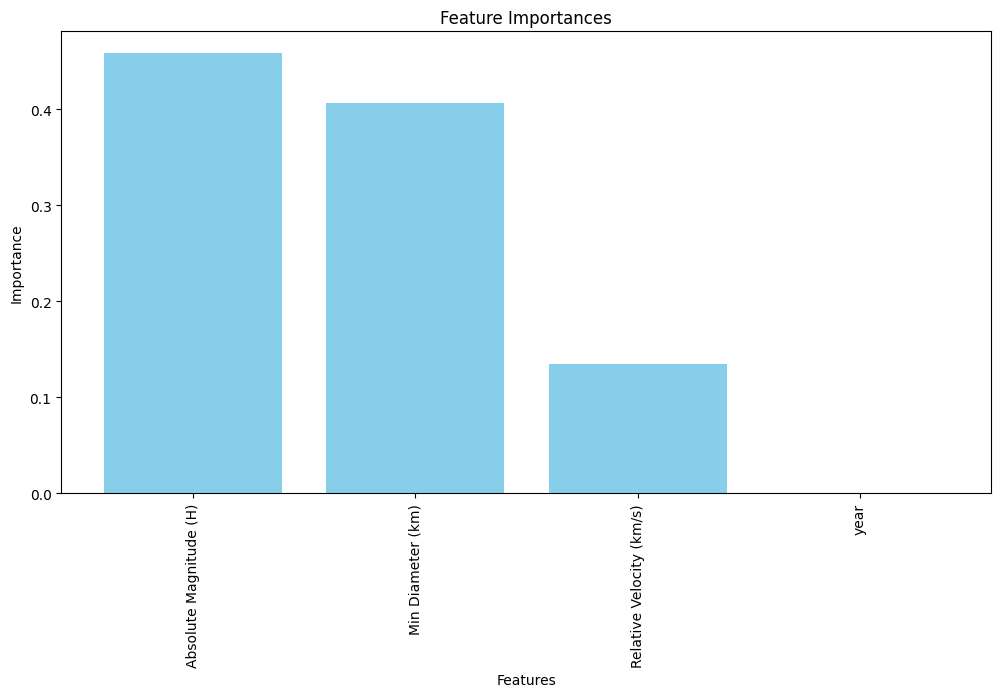

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importances)), feature_importances, color='skyblue')
plt.xticks(range(len(feature_importances)), feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")


plt.show()


